In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [2]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [3]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [4]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [5]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 114)


In [6]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'cnt',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomOverSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[tfFP7o8AGR5XzxxzWnt48Y-2018-10-12 16:20:23.086146] Launching
[jrVyFNWVhtcmANG7hNsgfJ-2018-10-12 16:20:23.591064] Launching
[f6f9L8RemqvZbPo7qXrQT5-2018-10-12 16:20:24.151404] Launching
[LN8yKpoC3wLZgrLhERDSdF-2018-10-12 16:20:24.688538] Launching
[PRjPEoKXSbdFGdVRrhPHTd-2018-10-12 16:20:25.246359] Launching
[C9bF4jGEwNXrbdqBkeoNbB-2018-10-12 16:20:25.822118] Launching
[WDbJSvmYpuMxqD7pyt6WTR-2018-10-12 16:20:26.362756] Launching
[DWGfA3YeEZM2RrfhZSi3H5-2018-10-12 16:20:26.901228] Launching
[H5Nf7ZvYc4aoTWoSLgUr2b-2018-10-12 16:20:27.449239] Launching
[vVp8osLw4CdqUq4x3J8tpJ-2018-10-12 16:20:28.045430] Launching
[tfFP7o8AGR5XzxxzWnt48Y-2018-10-12 16:26:51.741679] Done
[jrVyFNWVhtcmANG7hNsgfJ-2018-10-12 16:27:11.357270] Done
[f6f9L8RemqvZbPo7qXrQT5-2018-10-12 16:27:33.542035] Done
[vVp8osLw4CdqUq4x3J8tpJ-2018-10-12 16:27:35.679319] Done
[DWGfA3YeEZM2RrfhZSi3H5-2018-10-12 16:27:39.801957] Done
[H5Nf7ZvYc4aoTWoSLgUr2b-2018-10-12 16:27:52.935839] Done
[LN8yKpoC3wLZgrLhERDSdF-2018-10-12 16:

## SVM - Poly

In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=RandomOverSampler(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[fA8RgrrH5pGopVYtHHD2yL-2018-10-12 16:30:28.309770] Launching
[F9qhMNoR99VKAz2egrxDLK-2018-10-12 16:30:28.746992] Launching
[JvPqCStc8rsC6y8YpETPrb-2018-10-12 16:30:29.179729] Launching
[7FkDDhN6P4FocoGFQDQzi5-2018-10-12 16:30:29.628362] Launching
[VXLXvvsqifVBW9uE8mwHCi-2018-10-12 16:30:30.128292] Launching
[3MMXAa6MTgsYq2T5PjSYDe-2018-10-12 16:30:30.625058] Launching
[E7TXZENpaHBpe4J9g5wj56-2018-10-12 16:30:31.107125] Launching
[VqGzGVPDWo7BRM2uuB9E5R-2018-10-12 16:30:31.620281] Launching
[QXXgjkALgde2BM7UK6zPuH-2018-10-12 16:30:32.121790] Launching
[EqXXHTi3Wc8V9roTFGx35Y-2018-10-12 16:30:32.618382] Launching
[JvPqCStc8rsC6y8YpETPrb-2018-10-12 16:31:52.148125] Done
[VqGzGVPDWo7BRM2uuB9E5R-2018-10-12 16:31:52.473177] Done
[fA8RgrrH5pGopVYtHHD2yL-2018-10-12 16:31:53.331154] Done
[F9qhMNoR99VKAz2egrxDLK-2018-10-12 16:31:59.226259] Done
[3MMXAa6MTgsYq2T5PjSYDe-2018-10-12 16:31:59.601621] Done
[E7TXZENpaHBpe4J9g5wj56-2018-10-12 16:32:03.010685] Done
[EqXXHTi3Wc8V9roTFGx35Y-2018-10-12 16:

## Random Forest

In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=RandomOverSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[x6eVzgmFmZPMAtmcPrFNDd-2018-10-12 16:33:35.258131] Launching
[7keQ8KqQV7zAcubkbxfWib-2018-10-12 16:33:35.593755] Launching
[BiFzeehpBzuBRZ3XEyiXVk-2018-10-12 16:33:35.916674] Launching
[gcfg3cgicHUJi96uxGtTgR-2018-10-12 16:33:36.241535] Launching
[H46Ad7UJFYvdBjx7VrLQa8-2018-10-12 16:33:36.570575] Launching
[Ju3T2c7JWmNzQDnDQxN4Ca-2018-10-12 16:33:36.910564] Launching
[ADKw6shD4uAU9R4WWjUtmb-2018-10-12 16:33:37.351458] Launching
[Vq3VAAXMsnftcDv2VGmJom-2018-10-12 16:33:37.863975] Launching
[3DK7uHnVd7xDGWg8FsxTRS-2018-10-12 16:33:38.208522] Launching
[Z69rUeAQJprdiedBmERuvD-2018-10-12 16:33:38.671864] Launching
[Ju3T2c7JWmNzQDnDQxN4Ca-2018-10-12 16:34:39.272728] Done
[Z69rUeAQJprdiedBmERuvD-2018-10-12 16:34:39.639059] Done
[ADKw6shD4uAU9R4WWjUtmb-2018-10-12 16:34:40.336939] Done
[BiFzeehpBzuBRZ3XEyiXVk-2018-10-12 16:34:41.279914] Done
[Vq3VAAXMsnftcDv2VGmJom-2018-10-12 16:34:41.728734] Done
[3DK7uHnVd7xDGWg8FsxTRS-2018-10-12 16:34:42.366066] Done
[x6eVzgmFmZPMAtmcPrFNDd-2018-10-12 16:

## KNN

In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=RandomOverSampler(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[645RAxseoMwpAqhEQg4vye-2018-10-12 16:34:46.489391] Launching
[hp9no4CB2W92uN49PTsjp3-2018-10-12 16:34:46.924780] Launching
[GzZZ3hjufPEYfr5T47gjFM-2018-10-12 16:34:47.280604] Launching
[ga3LKYXvWZ7mp7FFjdZE8H-2018-10-12 16:34:47.775357] Launching
[78sWhS9E37ZdKeq7rxcFwP-2018-10-12 16:34:48.277415] Launching
[gyDUd7aRHKLSPd82fkH7fk-2018-10-12 16:34:48.785237] Launching
[3MJ9PajpsZjRYaDNxFcd8E-2018-10-12 16:34:49.299347] Launching
[dEgCXToJ7ojE6Wf6JgrLRH-2018-10-12 16:34:49.818458] Launching
[fiAz2mhtB5uG96fU9hySHG-2018-10-12 16:34:50.343360] Launching
[zWQ3a3mLwKgpwCWfRMZzJb-2018-10-12 16:34:50.879424] Launching
[hp9no4CB2W92uN49PTsjp3-2018-10-12 16:34:51.111604] Done
[GzZZ3hjufPEYfr5T47gjFM-2018-10-12 16:34:51.774210] Done
[78sWhS9E37ZdKeq7rxcFwP-2018-10-12 16:34:52.988069] Done
[gyDUd7aRHKLSPd82fkH7fk-2018-10-12 16:34:53.080689] Done
[645RAxseoMwpAqhEQg4vye-2018-10-12 16:34:53.692241] Done
[dEgCXToJ7ojE6Wf6JgrLRH-2018-10-12 16:34:54.293389] Done
[fiAz2mhtB5uG96fU9hySHG-2018-10-12 16:

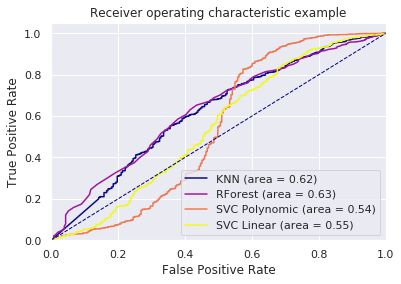

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})